# Understanding Time Series Forecasting with ARIMA

In [3]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 815.6 kB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")


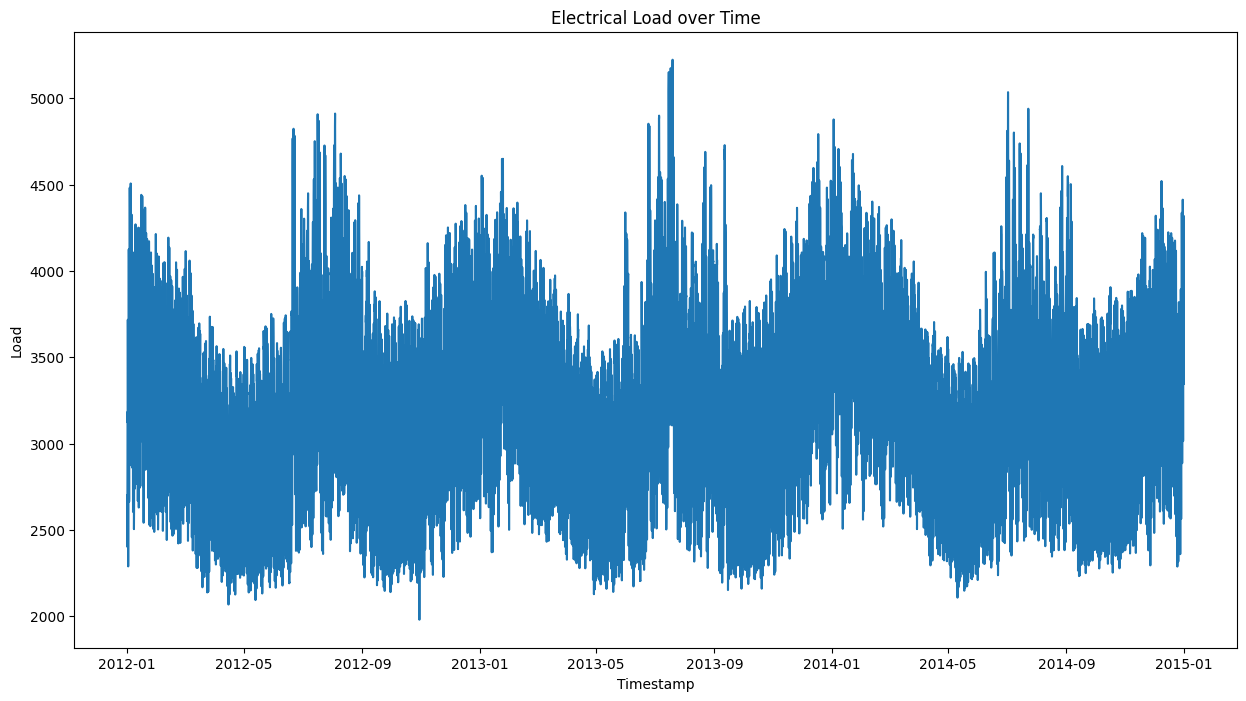

In [5]:
energy = pd.read_csv('energy.csv')
energy['timestamp'] = pd.to_datetime(energy['timestamp'])
energy.set_index('timestamp', inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(energy.index, energy['load'])
plt.xlabel('Timestamp')
plt.ylabel('Load')
plt.title('Electrical Load over Time')
plt.show()


In [6]:
train_start_dt = '2014-09-01'
test_start_dt = '2014-11-01'

train = energy.loc[train_start_dt:test_start_dt].copy()
test = energy.loc[test_start_dt:].copy()


In [7]:
scaler = MinMaxScaler()
train['load_scaled'] = scaler.fit_transform(train[['load']])
test['load_scaled'] = scaler.transform(test[['load']])


In [8]:
model = SARIMAX(train['load_scaled'], order=(1, 1, 1))
model_fit = model.fit(disp=False)


In [9]:
train['predictions'] = model_fit.predict(start=train_start_dt, end=test_start_dt)
test['predictions'] = model_fit.predict(start=test_start_dt, end=test.index[-1])


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['load_scaled'], test['predictions'])
mse = mean_squared_error(test['load_scaled'], test['predictions'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


Mean Absolute Error: 0.5368
Mean Squared Error: 0.3390
Root Mean Squared Error: 0.5822


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.11  0.08  0.06 ... -0.06 -0.06 -0.06].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

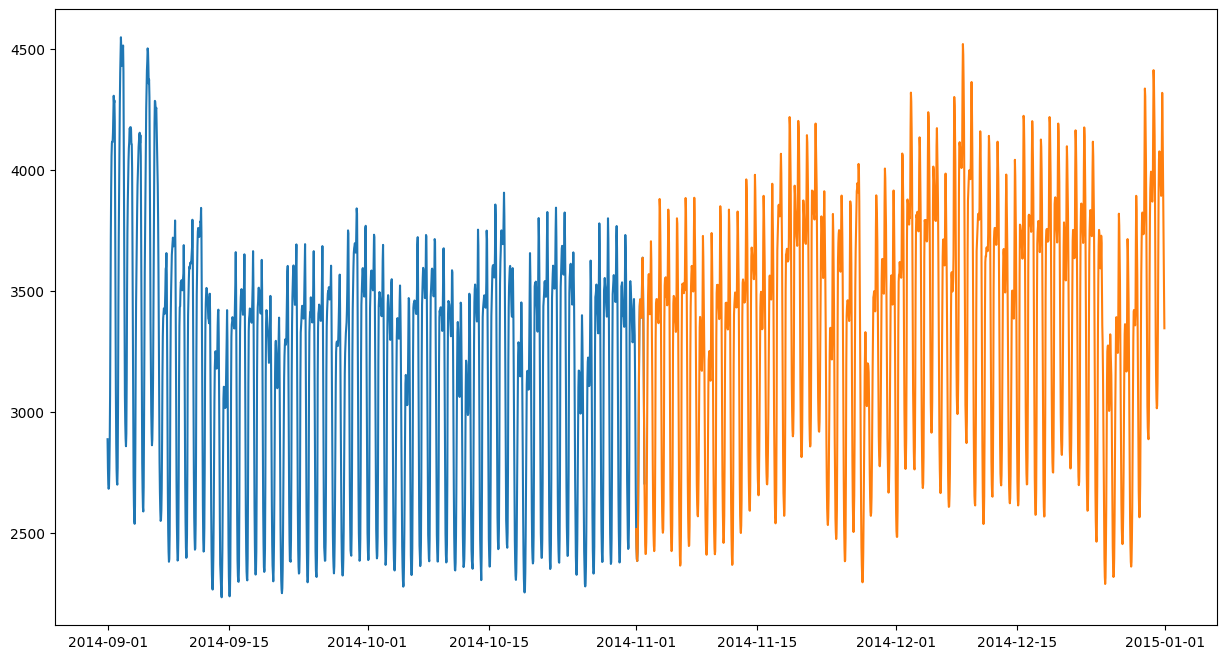

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(train.index, train['load'], label='Training Data')
plt.plot(test.index, test['load'], label='Actual Data')
plt.plot(test.index, scaler.inverse_transform(test['predictions']), label='Predictions')
plt.xlabel('Timestamp')
plt.ylabel('Load')
plt.title('ARIMA Model - Electrical Load Forecast')
plt.legend()
plt.show()
